## Problem 1

In [ ]:
import torch 
import torchvision
from torchvision import datasets
import numpy as np
import time
import numpy
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.datasets import MNIST

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class MNIST_GPU(MNIST):
  def __init__(self, *args, **kwargs):
    super(MNIST_GPU, self).__init__(*args, **kwargs)

    # Convert to tensor and send to GPU
    self.data = self.data.to(device)
    self.targets = self.targets.to(device)

    # # Scale the data to [0,1]
    self.data = self.data.unsqueeze(1).float().div(255)

    # # Normalize the data
    # self.data = self.data.sub_(0.1307).div_(0.3081)

    # # Flatten the dataset
    # self.data = torch.flatten(self.data, 1,-1)

  def __getitem__(self, idx):
    return self.data[idx], self.targets[idx]


  def __len__(self):
        return len(self.data)

In [ ]:
mnist_train= MNIST_GPU("mnist",
      train=True,
      download=True)

mnist_test=MNIST_GPU("mnist",
      train=False,
      download=True,
      )

In [ ]:
input_size = 784 ##input dimension
hidden_size = [1024,1024,1024,1024,1024] ## hidden_layer configuration
num_classes = 10
num_epochs = 200 ##no.of episodes
batch_size = 128

train_loader1 = torch.utils.data.DataLoader(dataset=mnist_train, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader1=torch.utils.data.DataLoader(dataset=mnist_test, 
                                         batch_size=10000,
                                           shuffle=False)

## Defining Network

In [ ]:
class FiveLayer_NeuralNet_512_problem_3(nn.Module):
    def __init__(self, input_size, hidden_size,num_classes,activation):
        super(FiveLayer_NeuralNet_512_problem_3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0])
        
        torch.nn.init.kaiming_normal_(self.fc1.weight)
        torch.nn.init.zeros_(self.fc1.bias)

        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1]) 
        torch.nn.init.kaiming_normal_(self.fc2.weight)
        torch.nn.init.zeros_(self.fc2.bias)


        self.fc3 = nn.Linear(hidden_size[1], hidden_size[2]) 
        torch.nn.init.kaiming_normal_(self.fc3.weight)
        torch.nn.init.zeros_(self.fc3.bias) 

        self.fc4 = nn.Linear(hidden_size[2], hidden_size[3])
        torch.nn.init.kaiming_normal_(self.fc4.weight)
        torch.nn.init.zeros_(self.fc4.bias) 

        self.fc5 = nn.Linear(hidden_size[3], hidden_size[4])  
        torch.nn.init.kaiming_normal_(self.fc5.weight)
        torch.nn.init.zeros_(self.fc5.bias) 

        self.fc6=  nn.Linear(hidden_size[4], num_classes)
        torch.nn.init.kaiming_normal_(self.fc6.weight)
        torch.nn.init.zeros_(self.fc6.bias) 

        if activation=="relu":
          self.act= nn.ReLU()
        if activation=="sigmoid":
          self.act=nn.Sigmoid()
        if activation=="tanh":
          self.act=nn.Tanh()

    
    def forward(self, x):
        x = x.reshape(-1, 28*28).cuda()
        self.layer1 = self.act(self.fc1(x))
        self.layer2 = self.act(self.fc2(self.layer1))
        self.layer3 = self.act(self.fc3(self.layer2))
        self.layer4 = self.act(self.fc4(self.layer3))
        self.layer5 = self.act(self.fc5(self.layer4))
        self.output = self.fc6( self.layer5)
        return self.output

In [ ]:
def final_ouput(model,num_epochs,train_loader,test_loader,learning_rate):

  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)  

  total_step = len(train_loader)
  errt=[0 for i in range(num_epochs)]
  accuracy_list=[]
  for epoch in range(num_epochs):
      running_loss=0
      model.train()
      for i, (images, labels) in enumerate(train_loader):
    
          # Move tensors to the configured device
      
          # Forward pass
          outputs = model(images).cuda()
          loss = criterion(outputs.cuda(), labels.cuda())
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          running_loss+=loss.item()
      
      errt[epoch]=running_loss/len(train_loader)
      check=accuracy(test_loader,model)
      accuracy_list.append(check)
      if epoch%5==0:
        print("Epoch:", epoch,"Loss:",running_loss/len(train_loader),"accuracy:",check)
  return accuracy_list


In [ ]:
def accuracy(test_loader,model):

  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for i,(images, labels) in enumerate(test_loader):
        labels = labels.cuda()
        outputs = model(images).cuda()
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)

        correct += (predicted == labels).sum().item()
      accuracy =100 * correct / total
  return accuracy

In [ ]:
model1 = FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,num_classes,"relu").cuda()
output1= final_ouput(model1,100,train_loader1,test_loader1,0.001)

Epoch: 0 Loss: 0.2134412064500995 accuracy: 96.23
Epoch: 5 Loss: 0.039949918781885745 accuracy: 97.55
Epoch: 10 Loss: 0.023476770513480395 accuracy: 98.13
Epoch: 15 Loss: 0.019578701094845247 accuracy: 98.07
Epoch: 20 Loss: 0.011517507044058132 accuracy: 98.17
Epoch: 25 Loss: 0.01611392843872465 accuracy: 98.41
Epoch: 30 Loss: 0.013686290709436544 accuracy: 98.27
Epoch: 35 Loss: 0.009306064924668015 accuracy: 98.18
Epoch: 40 Loss: 0.015521311985819278 accuracy: 98.35
Epoch: 45 Loss: 0.013248252105255263 accuracy: 98.33
Epoch: 50 Loss: 0.005426176722938236 accuracy: 98.21
Epoch: 55 Loss: 0.012799412818635813 accuracy: 98.13
Epoch: 60 Loss: 0.00892289649876664 accuracy: 98.28
Epoch: 65 Loss: 0.004650128483743035 accuracy: 98.41
Epoch: 70 Loss: 0.005100438745295601 accuracy: 98.42
Epoch: 75 Loss: 0.003570605230684606 accuracy: 98.3
Epoch: 80 Loss: 0.009151270459946946 accuracy: 98.33
Epoch: 85 Loss: 0.0039438506631490795 accuracy: 98.52
Epoch: 90 Loss: 2.284318127420514e-07 accuracy: 98.5

In [ ]:
layer1=model1.state_dict()["fc1.weight"]
layer2=model1.state_dict()["fc2.weight"]
layer3=model1.state_dict()["fc3.weight"]
layer4=model1.state_dict()["fc4.weight"]
layer5=model1.state_dict()["fc5.weight"]

## Performing SVD on each layer except the last one

In [ ]:
svd_layer1=torch.svd(layer1)
svd_layer2=torch.svd(layer2)
svd_layer3=torch.svd(layer3)
svd_layer4=torch.svd(layer4)
svd_layer5=torch.svd(layer5)

In [ ]:
def svd_for_each_layer_with_dimesion(svd_layer,k):
  svd_layer1_u_10=svd_layer[0][:,0:k]
  svd_layer1_s_10=svd_layer[1][0:k]

  svd_layer1_s_diag=torch.diag(svd_layer1_s_10)
  svd_layer1_v_10=svd_layer[2].T[0:k,:]


  df1=torch.matmul(svd_layer1_u_10,svd_layer1_s_diag)
  df2=torch.matmul(df1,svd_layer1_v_10)

  return df2


In [ ]:
finetuned=FiveLayer_NeuralNet_512_problem_3(input_size, hidden_size,num_classes,"relu").cuda()

In [ ]:
list_accuracy=[]
dimensions=[10,20,50,100,200,784]
for d in dimensions:
  pretext_model_assigned=model1.state_dict()
  pretext_model_assigned["fc1.weight"]=svd_for_each_layer_with_dimesion(svd_layer1,d)
  pretext_model_assigned["fc2.weight"]=svd_for_each_layer_with_dimesion(svd_layer2,d)
  pretext_model_assigned["fc3.weight"]=svd_for_each_layer_with_dimesion(svd_layer3,d)
  pretext_model_assigned["fc4.weight"]=svd_for_each_layer_with_dimesion(svd_layer4,d)
  pretext_model_assigned["fc5.weight"]=svd_for_each_layer_with_dimesion(svd_layer5,d)
  finetuned.load_state_dict(pretext_model_assigned)
  acc=accuracy(test_loader1,finetuned)
  print("The accuracy for dimesnion d=",d,"is:",acc)
  list_accuracy.append(acc)

The accuracy for dimesnion d= 10 is: 11.28
The accuracy for dimesnion d= 20 is: 48.17
The accuracy for dimesnion d= 50 is: 97.17
The accuracy for dimesnion d= 100 is: 98.33
The accuracy for dimesnion d= 200 is: 98.5
The accuracy for dimesnion d= 784 is: 98.55


Text(0.5, 1.0, 'Plot of Dimension vs Accuracy')

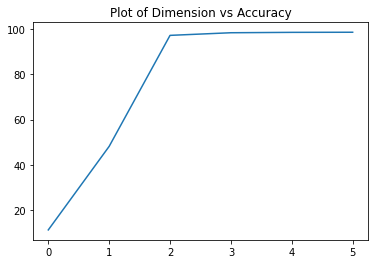

In [ ]:
plt.figure()
plt.plot(list_accuracy)
plt.title('Plot of Dimension vs Accuracy')

In [ ]:
print("The number of parameters for SVD with D=10:",1024*10+10+4*(1024*10+10+10*1024+1024)+1024*10+10+10*784+1024)
print("The number of parameters for SVD with D=20:",1024*10+10+4*(1024*20+20+20*1024+1024)+1024*20+20+20*784)
print("The number of parameters for SVD with D=50:",1024*10+10+4*(1024*50+50+50*1024+1024)+1024*50+50+50*784)
print("The number of parameters for SVD with D=100:",1024*10+10+4*(1024*100+100+100*1024+1024)+1024*100+100+100*784)
print("The number of parameters for SVD with D=200:",1024*10+10+4*(1024*200+200+50*1024+1024)+1024*200+200+200*784)
print("The number of parameters for SVD with D=784:",1024*10+10+4*(1024*784+784+784*1024+1024)+1024*784+784+784*784)

The number of parameters for SVD with D=10: 115420
The number of parameters for SVD with D=20: 214446
The number of parameters for SVD with D=50: 514596
The number of parameters for SVD with D=100: 1014846
The number of parameters for SVD with D=200: 1400946
The number of parameters for SVD with D=784: 7858266


## Question 2

### Defining Network

In [ ]:
class question2(nn.Module):
    def __init__(self, input_size,num_classes,activation):
        super(question2, self).__init__()
        
        self.fc1_v = nn.Linear(input_size,20,bias=False)
        self.fc1_u=nn.Linear(20,1024)

        torch.nn.init.kaiming_normal_(self.fc1_v.weight)
        torch.nn.init.kaiming_normal_(self.fc1_u.weight)
        torch.nn.init.zeros_(self.fc1_u.bias)

        self.fc2_v = nn.Linear(1024, 20,bias=False) 
        self.fc2_u= nn.Linear(20,1024) 
        
     
        torch.nn.init.kaiming_normal_(self.fc2_v.weight)
        torch.nn.init.kaiming_normal_(self.fc2_u.weight)
        torch.nn.init.zeros_(self.fc2_u.bias)


        self.fc3_v = nn.Linear(1024, 20,bias=False) 
        self.fc3_u= nn.Linear(20,1024) 
        
        
        torch.nn.init.kaiming_normal_(self.fc3_v.weight)
        torch.nn.init.kaiming_normal_(self.fc3_u.weight)
        torch.nn.init.zeros_(self.fc3_u.bias) 

        self.fc4_v = nn.Linear(1024, 20,bias=False) 
        self.fc4_u= nn.Linear(20,1024)
        
        torch.nn.init.kaiming_normal_(self.fc4_v.weight)
        torch.nn.init.kaiming_normal_(self.fc4_u.weight)
        torch.nn.init.zeros_(self.fc4_u.bias) 

        self.fc5_v = nn.Linear(1024, 20,bias=False) 
        self.fc5_u= nn.Linear(20,1024)
      
        torch.nn.init.kaiming_normal_(self.fc5_v.weight)
        torch.nn.init.kaiming_normal_(self.fc5_u.weight)
        torch.nn.init.zeros_(self.fc5_u.bias)

        self.fc6=  nn.Linear(hidden_size[4], num_classes)
        
        torch.nn.init.kaiming_normal_(self.fc6.weight)
        torch.nn.init.zeros_(self.fc6.bias) 

        if activation=="relu":
          self.act= nn.ReLU()
        if activation=="sigmoid":
          self.act=nn.Sigmoid()
        if activation=="tanh":
          self.act=nn.Tanh()

    
    def forward(self, x):
        x = x.reshape(-1, 28*28).cuda()
        self.layer1 = self.act(self.fc1_u(self.fc1_v(x)))
        self.layer2 = self.act(self.fc2_u(self.fc2_v(self.layer1)))
        self.layer3 = self.act(self.fc3_u(self.fc3_v(self.layer2)))
        self.layer4 = self.act(self.fc4_u(self.fc4_v(self.layer3)))
        self.layer5 = self.act(self.fc5_u(self.fc5_v(self.layer4)))
        self.output = self.fc6(self.layer5)
        return self.output

### Function for finding Initial U and V matrices with D=20

In [ ]:
def svd_for_each_layer_with_dimesion_pb2(svd_layer,k):
  svd_layer1_u_10=svd_layer[0][:,0:k]
  svd_layer1_s_10=svd_layer[1][0:k]

  svd_layer1_s_diag=torch.diag(svd_layer1_s_10)
  svd_layer1_v_10=svd_layer[2].T[0:k,:]
  df2=torch.matmul(svd_layer1_s_diag,svd_layer1_v_10)

  return svd_layer1_u_10,df2

In [ ]:
new_model = question2(784,10,"relu").cuda()

In [ ]:
pb2_layer1= svd_for_each_layer_with_dimesion_pb2(svd_layer1,20)
pb2_layer2= svd_for_each_layer_with_dimesion_pb2(svd_layer2,20)
pb2_layer3 =svd_for_each_layer_with_dimesion_pb2(svd_layer3,20)
pb2_layer4=svd_for_each_layer_with_dimesion_pb2(svd_layer4,20)
pb2_layer5=svd_for_each_layer_with_dimesion_pb2(svd_layer5,20)

## Transferring the weights to the model

In [ ]:
new_model.fc1_v.weight.data = pb2_layer1[1]
new_model.fc1_u.weight.data = pb2_layer1[0]
new_model.fc2_v.weight.data = pb2_layer2[1]
new_model.fc2_u.weight.data = pb2_layer2[0]
new_model.fc3_v.weight.data = pb2_layer3[1]
new_model.fc3_u.weight.data = pb2_layer3[0]
new_model.fc4_v.weight.data = pb2_layer4[1]
new_model.fc4_u.weight.data = pb2_layer4[0]
new_model.fc5_v.weight.data = pb2_layer5[1]
new_model.fc5_u.weight.data = pb2_layer5[0]

In [ ]:
output_pb2= final_ouput(new_model,100,train_loader1,test_loader1,0.00001)

Epoch: 0 Loss: 1.896006327448115 accuracy: 45.07
Epoch: 5 Loss: 0.13756623219595407 accuracy: 96.04
Epoch: 10 Loss: 0.09180675417200716 accuracy: 96.97
Epoch: 15 Loss: 0.07081524100996602 accuracy: 97.13
Epoch: 20 Loss: 0.058134547043427916 accuracy: 97.29
Epoch: 25 Loss: 0.048665541655588535 accuracy: 97.42
Epoch: 30 Loss: 0.04133414503892879 accuracy: 97.46
Epoch: 35 Loss: 0.0354109857110247 accuracy: 97.51
Epoch: 40 Loss: 0.030631274773504958 accuracy: 97.59
Epoch: 45 Loss: 0.026552952978182148 accuracy: 97.65
Epoch: 50 Loss: 0.022890887418099103 accuracy: 97.64
Epoch: 55 Loss: 0.019806353561605004 accuracy: 97.63
Epoch: 60 Loss: 0.01704715775980079 accuracy: 97.64
Epoch: 65 Loss: 0.014756006672720251 accuracy: 97.68
Epoch: 70 Loss: 0.012716646983074696 accuracy: 97.66
Epoch: 75 Loss: 0.011122609065624971 accuracy: 97.69
Epoch: 80 Loss: 0.00946991330865378 accuracy: 97.68
Epoch: 85 Loss: 0.007939451870049966 accuracy: 97.71
Epoch: 90 Loss: 0.006944368172676857 accuracy: 97.62
Epoch:

Text(0.5, 1.0, 'Plot of Accuracy vs Iterations')

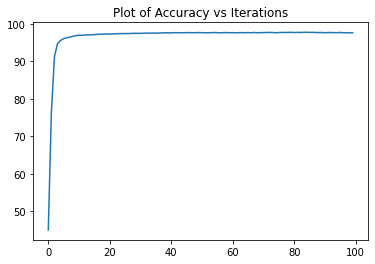

In [ ]:
plt.figure()
plt.plot(output_pb2)
plt.title('Plot of Accuracy vs Iterations')

In [ ]:
print("The test accuracy is :",output_pb2[99])

The test accuracy is : 97.61


## Problem 3

In [ ]:
import math

In [ ]:
class low_dim(torch.autograd.Function):
    @staticmethod
    def forward(ctx, w, d=20):
        u, s, v = torch.svd(w)
        U = u[:, :d].requires_grad_()
        S = torch.diag(s[:d])
        V = torch.mm(S, v[:, :20].T).requires_grad_()
        tu =torch.mm(U, V).requires_grad_()
        
        return tu
    
    @staticmethod
    def backward(ctx, grad_output):
        return grad_output

In [ ]:
class MyLinearLayer(nn.Module):
    """ Custom Linear layer but mimics a standard linear layer """
    def __init__(self, size_in, size_out):
        super().__init__()
        self.size_in, self.size_out = size_in, size_out
        weights = torch.Tensor(size_out, size_in)
        self.weight = nn.Parameter(weights)  # nn.Parameter is a Tensor that's a module parameter.
        bias = torch.Tensor(size_out)
        self.bias = nn.Parameter(bias)

        # initialize weights and biases
        nn.init.kaiming_uniform_(self.weight, a=math.sqrt(5)) # weight init
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias init
        self.low=low_dim.apply

    def forward(self, x):
        w_times_x= torch.mm(x, self.low(self.weight.t()))
        return torch.add(w_times_x, self.bias)  # w times x + b

In [ ]:
class FiveLayer_pb3(nn.Module):
    def __init__(self, input_size,hidden_size,num_classes,activation):
        super(FiveLayer_pb3, self).__init__()
        
        self.fc1 = MyLinearLayer(input_size, hidden_size[0])
        self.fc2 = MyLinearLayer(hidden_size[0], hidden_size[1]) 
        self.fc3 = MyLinearLayer(hidden_size[1], hidden_size[2]) 
        self.fc4 = MyLinearLayer(hidden_size[2], hidden_size[3])
        self.c5 f= MyLinearLayer(hidden_size[3], hidden_size[4])  
        self.fc6= MyLinearLayer(hidden_size[4], num_classes)

        if activation=="relu":
          self.act= nn.ReLU()
        if activation=="sigmoid":
          self.act=nn.Sigmoid()
        if activation=="tanh":
          self.act=nn.Tanh()
        self.low = low_dim.apply

    
    def forward(self, x):
        x = x.reshape(-1, 28*28).cuda()
        self.layer1 = self.act(self.fc1(x)) 
        self.layer2 = self.act(self.fc2(self.layer1))
        self.layer3 = self.act(self.fc3(self.layer2))
        self.layer4 = self.act(self.fc4(self.layer3))
        self.layer5 = self.act(self.fc5(self.layer4))
        self.output = self.fc6( self.layer5)
        return self.output

In [ ]:
finetuned_pb3=FiveLayer_pb3(784, hidden_size,10,"relu").cuda()

In [ ]:
finetuned_pb3.load_state_dict(model1.state_dict())

<All keys matched successfully>

In [ ]:
output_pb3= final_ouput(finetuned_pb3,20,train_loader1,test_loader1,0.001)

Epoch: 0 Loss: 0.14954905402360122 accuracy: 96.76
Epoch: 5 Loss: 0.05543531835385 accuracy: 97.16
Epoch: 10 Loss: 0.05516702125195477 accuracy: 97.76
Epoch: 15 Loss: 0.053191928173115514 accuracy: 97.5


The accuracy for the above problem 3  is 97.5 %



